kmer-size hypothesis: 

https://docs.google.com/presentation/d/14wXPn0w1Oh_oFJm-eMnWVIoztRw8Wc10qlVw86ZJg5k/edit#slide=id.g212e03d432d_0_23

In [164]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [165]:
import seaborn as sns 
sns.set(font_scale = 1.5)

In [166]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import pandas as pd 

pd.set_option('display.max_rows', 30)

def get_observations_and_mchale_predictions_on_chen_windows(kmer_size, train_set_label='noncoding'):
    # zscores were computed using dist/model-germline-grch38-Nonly.kmerSize-X.trainSet-Y.json                                                                  
    filename = f'{CONSTRAINT_TOOLS_DATA}/genome-wide-predictions/predict-germline-grch38-Nonly.chenWindows.kmerSize-{kmer_size}.trainSet-{train_set_label}.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

get_observations_and_mchale_predictions_on_chen_windows(kmer_size=3)

chromosome     start       end  position     N_bar  N_observed  \
0             chr1   1432000   1433000   1432500 -0.247615         260   
1             chr1   1435000   1436000   1435500 -7.547130         275   
2             chr1   1449000   1450000   1449500  0.258359         225   
3             chr1   1450000   1451000   1450500  2.197534         313   
4             chr1   1451000   1452000   1451500  2.367303         293   
...            ...       ...       ...       ...       ...         ...   
1796995      chr22  50224000  50225000  50224500  0.460666         254   
1796996      chr22  50227000  50228000  50227500  1.220947         283   
1796997      chr22  50228000  50229000  50228500 -0.317039         241   
1796998      chr22  50229000  50230000  50229500 -1.323602         231   
1796999      chr22  50236000  50237000  50236500 -1.017575         218   

         N_mean_null  N_variance_null  
0         263.528599       203.072610  
1         387.939429       223.937877  
2         221.559138       177.372370  
3         281.968822       199.400099  
4         260.131776       192.772432  
...              ...              ...  
1796995   247.621441       191.722062  
1796996   265.702672       200.707864  
1796997   245.471769       198.944848  
1796998   249.385105       192.937946  
1796999   231.983951       188.854498  

[1797000 rows x 8 columns]

## 1000bp windows are too small to test hypothesis (1)

The scatter about the red line is due to variance in predicted SNV count, which would occur even if parameters were estimated perfectly!


standard deviation of expected SNV density: 13.318212875435194
Pearson correlation between N_mean_null and N_observed: 0.33


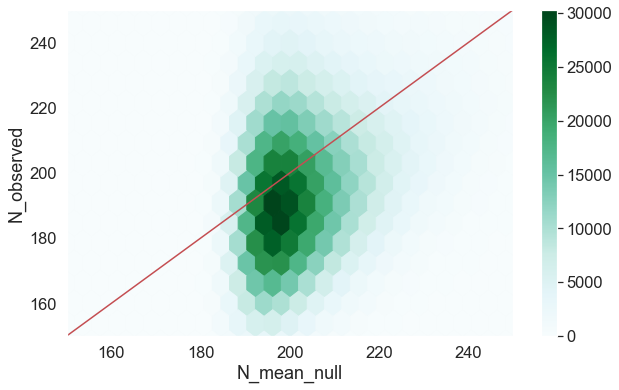

In [167]:
import matplotlib.pyplot as plt 
import numpy as np 

def correlate_Nobserved_with_NMeanNull(kmer_size): 
    df = get_observations_and_mchale_predictions_on_chen_windows(kmer_size)

    print(f'standard deviation of expected SNV density: {np.sqrt(np.mean(df["N_variance_null"]))}')

    x, y = 'N_mean_null', 'N_observed'
    correlation = df[x].corr(df[y], method='pearson')
    print(f"Pearson correlation between {x} and {y}: {round(correlation, 2)}")

    df.plot.hexbin(x=x, y=y, sharex=False)
    plt.plot([100, 500], [100, 500], '-r')
    lims = [150, 250]
    plt.xlim(lims)
    plt.ylim(lims)
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    
correlate_Nobserved_with_NMeanNull(kmer_size=3)

standard deviation of expected SNV density: 13.26591404242556
Pearson correlation between N_mean_null and N_observed: 0.33


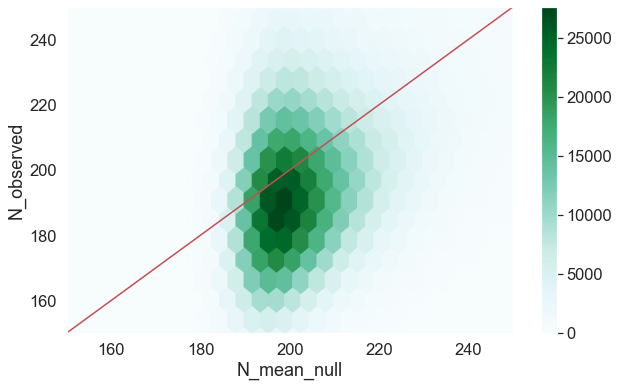

In [168]:
correlate_Nobserved_with_NMeanNull(kmer_size=5)

standard deviation of expected SNV density: 13.230973286328071
Pearson correlation between N_mean_null and N_observed: 0.34


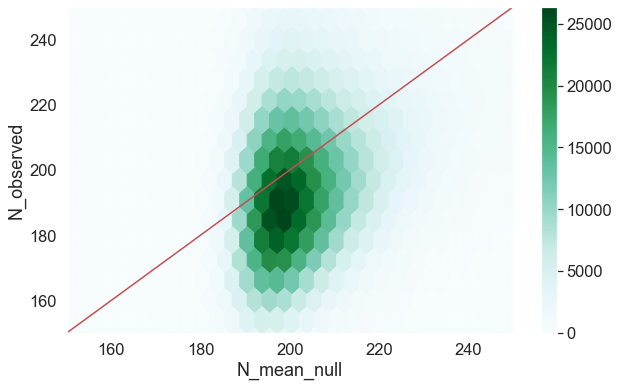

In [169]:
correlate_Nobserved_with_NMeanNull(kmer_size=7)

## 1000bp windows are too small to test hypothesis (2)

Noise in the expected value of SNV counts per window (`N_mean_null_X`) as a result of using different kmer sizes `X` is dwarfed by the noise in the observed value of SNV count (`N_observed`).


In [170]:
def get_mchale_predictions_on_chen_windows(kmer_size):
    columns = ['chromosome', 'start', 'end', 'N_bar', 'N_mean_null', 'N_variance_null']
    df = get_observations_and_mchale_predictions_on_chen_windows(kmer_size)[columns]
    df = df.rename(columns={
        'N_bar': f'N_bar_{kmer_size}',
        'N_mean_null': f'N_mean_null_{kmer_size}',
        'N_variance_null': f'N_variance_null_{kmer_size}',
    })
    return df

def get_observations_on_chen_windows(kmer_size):
    columns = ['chromosome', 'start', 'end', 'N_observed']
    df = get_observations_and_mchale_predictions_on_chen_windows(kmer_size)[columns]
    return df

from functools import reduce

def get_observations_and_ALL_mchale_predictions_on_chen_windows():
    on = ['chromosome', 'start', 'end']
    how = 'inner'

    dfs = [get_observations_on_chen_windows(kmer_size=3)]

    for kmer_size in [3, 5, 7]: 
        dfs.append(get_mchale_predictions_on_chen_windows(kmer_size))

    return reduce(
        lambda left, right: pd.merge(left, right, on=on, how=how), 
        dfs
    )

observations_and_ALL_mchale_predictions_on_chen_windows = get_observations_and_ALL_mchale_predictions_on_chen_windows()
observations_and_ALL_mchale_predictions_on_chen_windows

chromosome     start       end  N_observed   N_bar_3  N_mean_null_3  \
0             chr1   1432000   1433000         260 -0.247615     263.528599   
1             chr1   1435000   1436000         275 -7.547130     387.939429   
2             chr1   1449000   1450000         225  0.258359     221.559138   
3             chr1   1450000   1451000         313  2.197534     281.968822   
4             chr1   1451000   1452000         293  2.367303     260.131776   
...            ...       ...       ...         ...       ...            ...   
1796995      chr22  50224000  50225000         254  0.460666     247.621441   
1796996      chr22  50227000  50228000         283  1.220947     265.702672   
1796997      chr22  50228000  50229000         241 -0.317039     245.471769   
1796998      chr22  50229000  50230000         231 -1.323602     249.385105   
1796999      chr22  50236000  50237000         218 -1.017575     231.983951   

         N_variance_null_3   N_bar_5  N_mean_null_5  N_variance_null_5  \
0               203.072610 -0.339806     264.852332         203.910737   
1               223.937877 -6.810107     375.796139         219.068492   
2               177.372370  0.330975     220.612316         175.743926   
3               199.400099  2.480911     278.322530         195.376527   
4               192.772432  2.725116     255.650992         187.839972   
...                    ...       ...            ...                ...   
1796995         191.722062  0.496005     247.169019         189.668194   
1796996         200.707864  1.340543     264.132772         198.086499   
1796997         198.944848 -0.348897     245.916863         198.601635   
1796998         192.937946 -1.250236     248.270789         190.827211   
1796999         188.854498 -0.921063     230.584654         186.682486   

          N_bar_7  N_mean_null_7  N_variance_null_7  
0       -0.372778     265.321432         203.777753  
1       -6.280673     368.627875         222.227572  
2        0.139977     223.137143         177.111728  
3        2.524948     277.859484         193.691881  
4        2.951595     252.829443         185.226049  
...           ...            ...                ...  
1796995  0.557227     246.341222         188.909706  
1796996  1.371285     263.752490         197.012560  
1796997 -0.330285     245.639165         197.288944  
1796998 -1.225998     247.885488         189.691434  
1796999 -0.900742     230.250143         184.961512  

[1797000 rows x 13 columns]

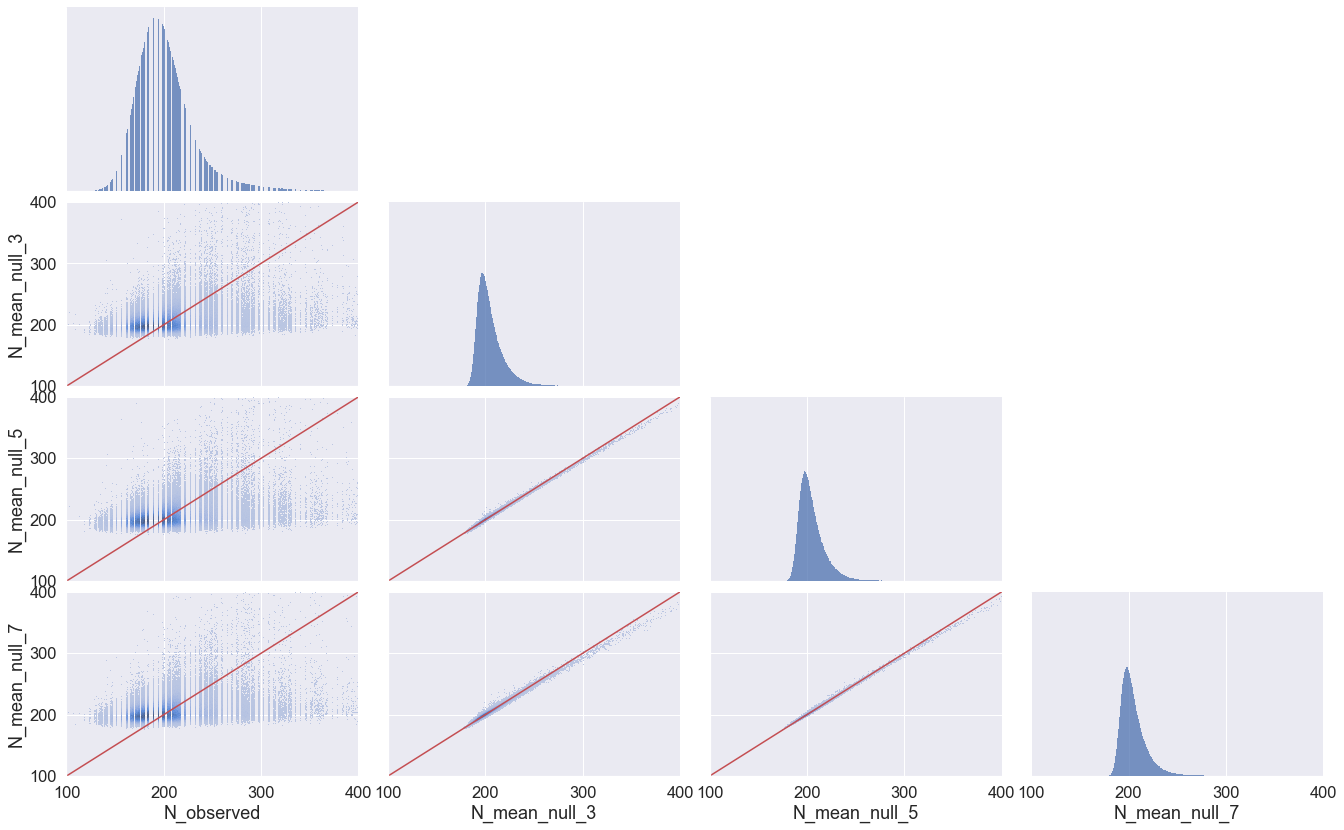

In [171]:
def correlate_Nobserved_with_ALL_NMeanNull():
    df = observations_and_ALL_mchale_predictions_on_chen_windows
    g = sns.pairplot(df[['N_observed', 'N_mean_null_3', 'N_mean_null_5', 'N_mean_null_7']], corner=True, kind='hist')
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    for i in range(4): 
        for j in range(i+1):            
            g.axes[i,j].set_xlim((100, 400))
    for i in range(1,4): 
        for j in range(i):            
            g.axes[i,j].set_ylim((100, 400))
            g.axes[i,j].plot([100, 400], [100, 400], 'r-')

correlate_Nobserved_with_ALL_NMeanNull()

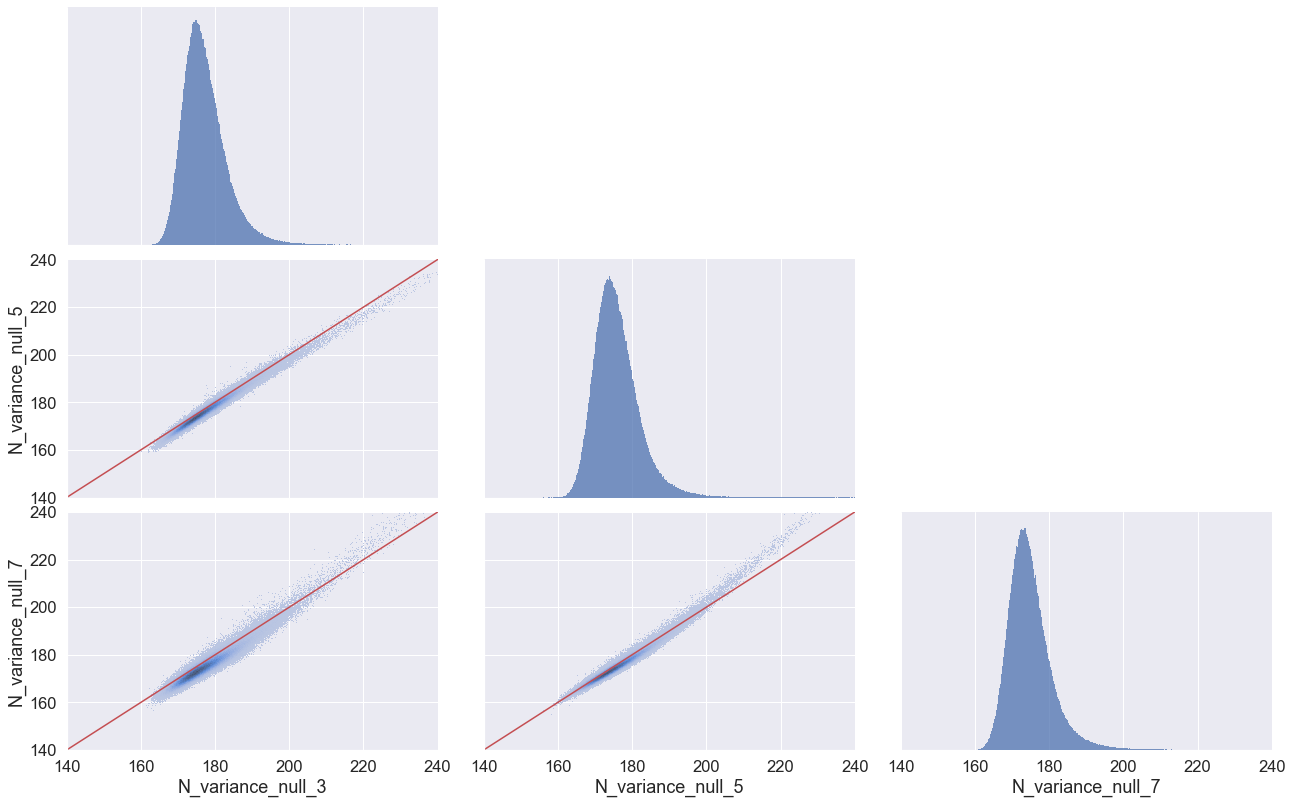

In [172]:
def correlate_ALL_NVarianceNull():
    df = observations_and_ALL_mchale_predictions_on_chen_windows
    g = sns.pairplot(df[['N_variance_null_3', 'N_variance_null_5', 'N_variance_null_7']], corner=True, kind='hist')
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    for i in range(3): 
        for j in range(i+1):            
            g.axes[i,j].set_xlim((140, 240))
    for i in range(1,3): 
        for j in range(i):            
            g.axes[i,j].set_ylim((140, 240))
            g.axes[i,j].plot([140, 240], [140, 240], 'r-')

correlate_ALL_NVarianceNull()

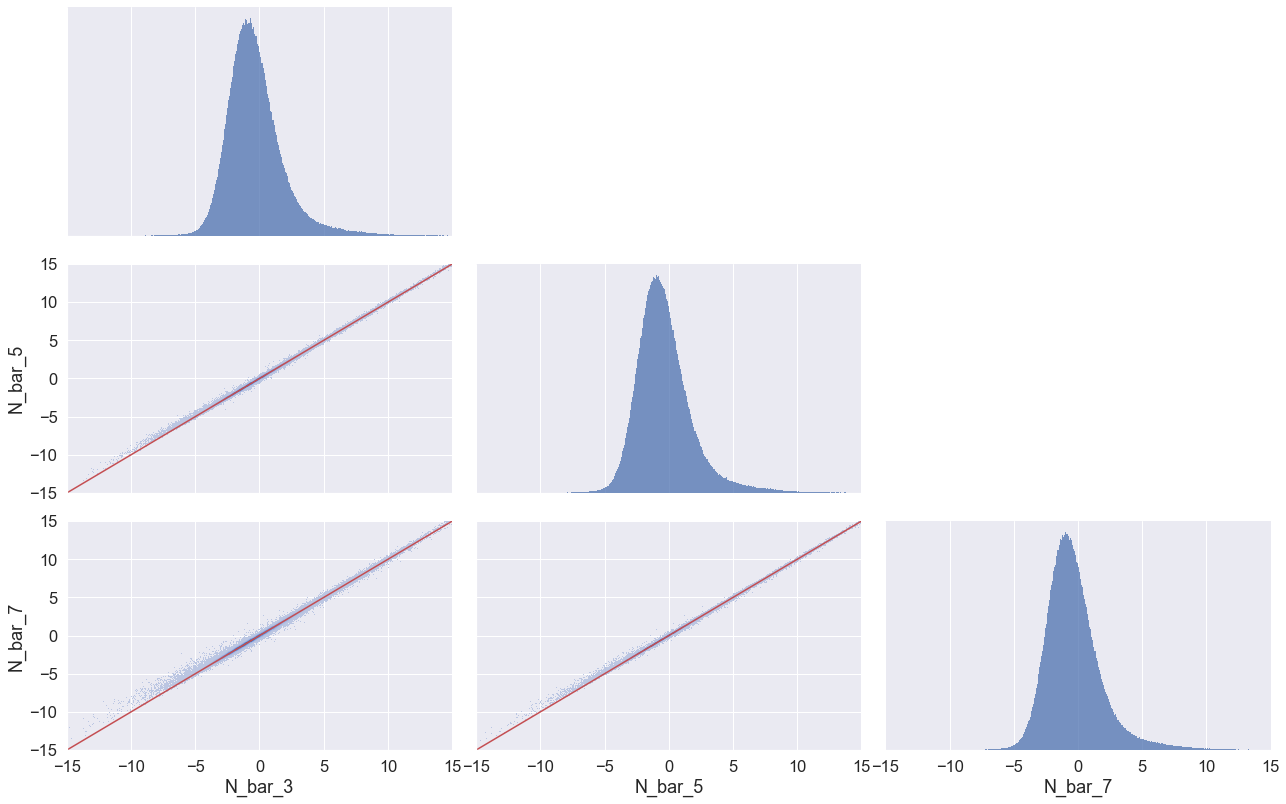

In [173]:
def correlate_Nobserved_with_ALL_NBar():
    df = observations_and_ALL_mchale_predictions_on_chen_windows
    g = sns.pairplot(df[['N_bar_3', 'N_bar_5', 'N_bar_7']], corner=True, kind='hist')
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    for i in range(3): 
        for j in range(i+1):            
            g.axes[i,j].set_xlim((-15, 15))
    for i in range(1,3): 
        for j in range(i):            
            g.axes[i,j].set_ylim((-15, 15))
            g.axes[i,j].plot([-15, 15], [-15, 15], 'r-')

correlate_Nobserved_with_ALL_NBar()

## Evidence supporting noisy-parameter hypothesis

Windows with the lowest z-scores, where kmer-model predictions diverge most, also harbor the largest substitution probabilities, errors in which are expected to matter more


In [174]:
import warnings

def compute_array_of_quantiles():
    array_of_quantiles = [0.00, 0.002, 0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995, 0.998, 1.00]

    starts = array_of_quantiles[:-1]
    ends = array_of_quantiles[1:]
    quantile_labels = [f'{start} - {end}' for start, end in zip(starts, ends)]
    
    return array_of_quantiles, quantile_labels

def label_windows_with_score_quantiles_core(df, score): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        

        array_of_quantiles, quantile_labels = compute_array_of_quantiles()

        df[f'{score} quantile'], bins = pd.qcut(
            df[score],
            q = array_of_quantiles, 
            labels = quantile_labels, 
            retbins = True,
    #         duplicates='drop'
        )

        return df
    
import plotly.graph_objects as go
from tqdm import tqdm 
import numpy as np 

def compute_N_vs_quantile(df, kmer_size): 
    score = f'N_bar_{kmer_size}'
    
    df = label_windows_with_score_quantiles_core(df, score)

    groups = df.groupby([f'{score} quantile'])
    aggregated = groups.agg({
        'N_observed': ['mean'],
        f'N_mean_null_{kmer_size}': ['mean'],
        score: ['mean', 'std', 'count']
    })
    
    quantiles = np.array(aggregated.index)
    mean_N_observed = np.array(aggregated['N_observed']).flatten()
    mean_N_mean_null = np.array(aggregated[f'N_mean_null_{kmer_size}']).flatten()
    hover_data = aggregated.to_dict(orient='records')

    return quantiles, mean_N_observed, mean_N_mean_null, hover_data

def create_text(hover_datum, kmer_size):
    score = f'N_bar_{kmer_size}'
    mean = hover_datum[(score, 'mean')]
    std = hover_datum[(score, 'std')]
    count = hover_datum[(score, 'count')]
    return (
        f'{score} mean: {mean}<br>'
        f'{score} std: {std}<br>' 
        f'number of windows: {count}<br>' 
    )

def plot_N_vs_quantile(): 
    df = observations_and_ALL_mchale_predictions_on_chen_windows

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        fig = go.Figure()

        kmerSizes_markers_colors = []
        for kmer_size, color in zip([3, 5, 7], ['red', 'green', 'blue']): 
            kmerSizes_markers_colors.append((kmer_size, 'circle', color))
                
        for (kmer_size, marker, color) in tqdm(kmerSizes_markers_colors, desc=None): 
            (
                quantiles, 
                mean_N_observed,
                mean_N_mean_null,
                hover_data 
            ) = compute_N_vs_quantile(df, kmer_size)
            fig.add_trace(
                go.Scatter(
                    x = quantiles, 
                    y = mean_N_observed,
                    mode = 'lines+markers',
                    line = {
                        'color': color, 
                        'dash': 'dot'
                    },
                    marker = {
                        'symbol': marker,
                    },
                    name = f'N_observed (after ranking by N_bar_{kmer_size})',
                    hovertemplate = (
                        '%{text}'
                    ),
                    text = [create_text(hover_datum, kmer_size) for hover_datum in hover_data],
                )
            )
            fig.add_trace(
                go.Scatter(
                    x = quantiles, 
                    y = mean_N_mean_null,
                    mode = 'lines+markers',
                    line = {
                        'color': color, 
                    },
                    marker = {
                        'symbol': marker,
                    },
                    name = f'N_mean_null (kmer_size = {kmer_size})',
                    hovertemplate = (
                        '%{text}'
                    ),
                    text = [create_text(hover_datum, kmer_size) for hover_datum in hover_data],
                )
            )

        mean_N_observed_genome_wide = np.mean(df['N_observed'])
        fig.add_trace(
            go.Scatter(
                x = quantiles, 
                y = [mean_N_observed_genome_wide]*len(quantiles),
                mode = 'lines',
                name = 'mean_N_observed_genome_wide',
            )
        )

        fig.update_xaxes(
            title = 'quantile of window score (N_bar_{kmer_size})',
#             type = "log", 
#             exponentformat = 'power'
        )
        fig.update_yaxes(
            title = None,
            range=None, 
        )    
        fig.update_layout(
            height = 800, 
            width = 1200,
            font = dict(
                size = 20,
            )        
        )
        fig.update_annotations(font_size=24)
        fig.show()
        
plot_N_vs_quantile()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.19it/s]


## Expanding window size does reduce noise in mutation rate (expected and observed), but other sources of noise persist, preventing a good correlation between expected and observed mutation rates



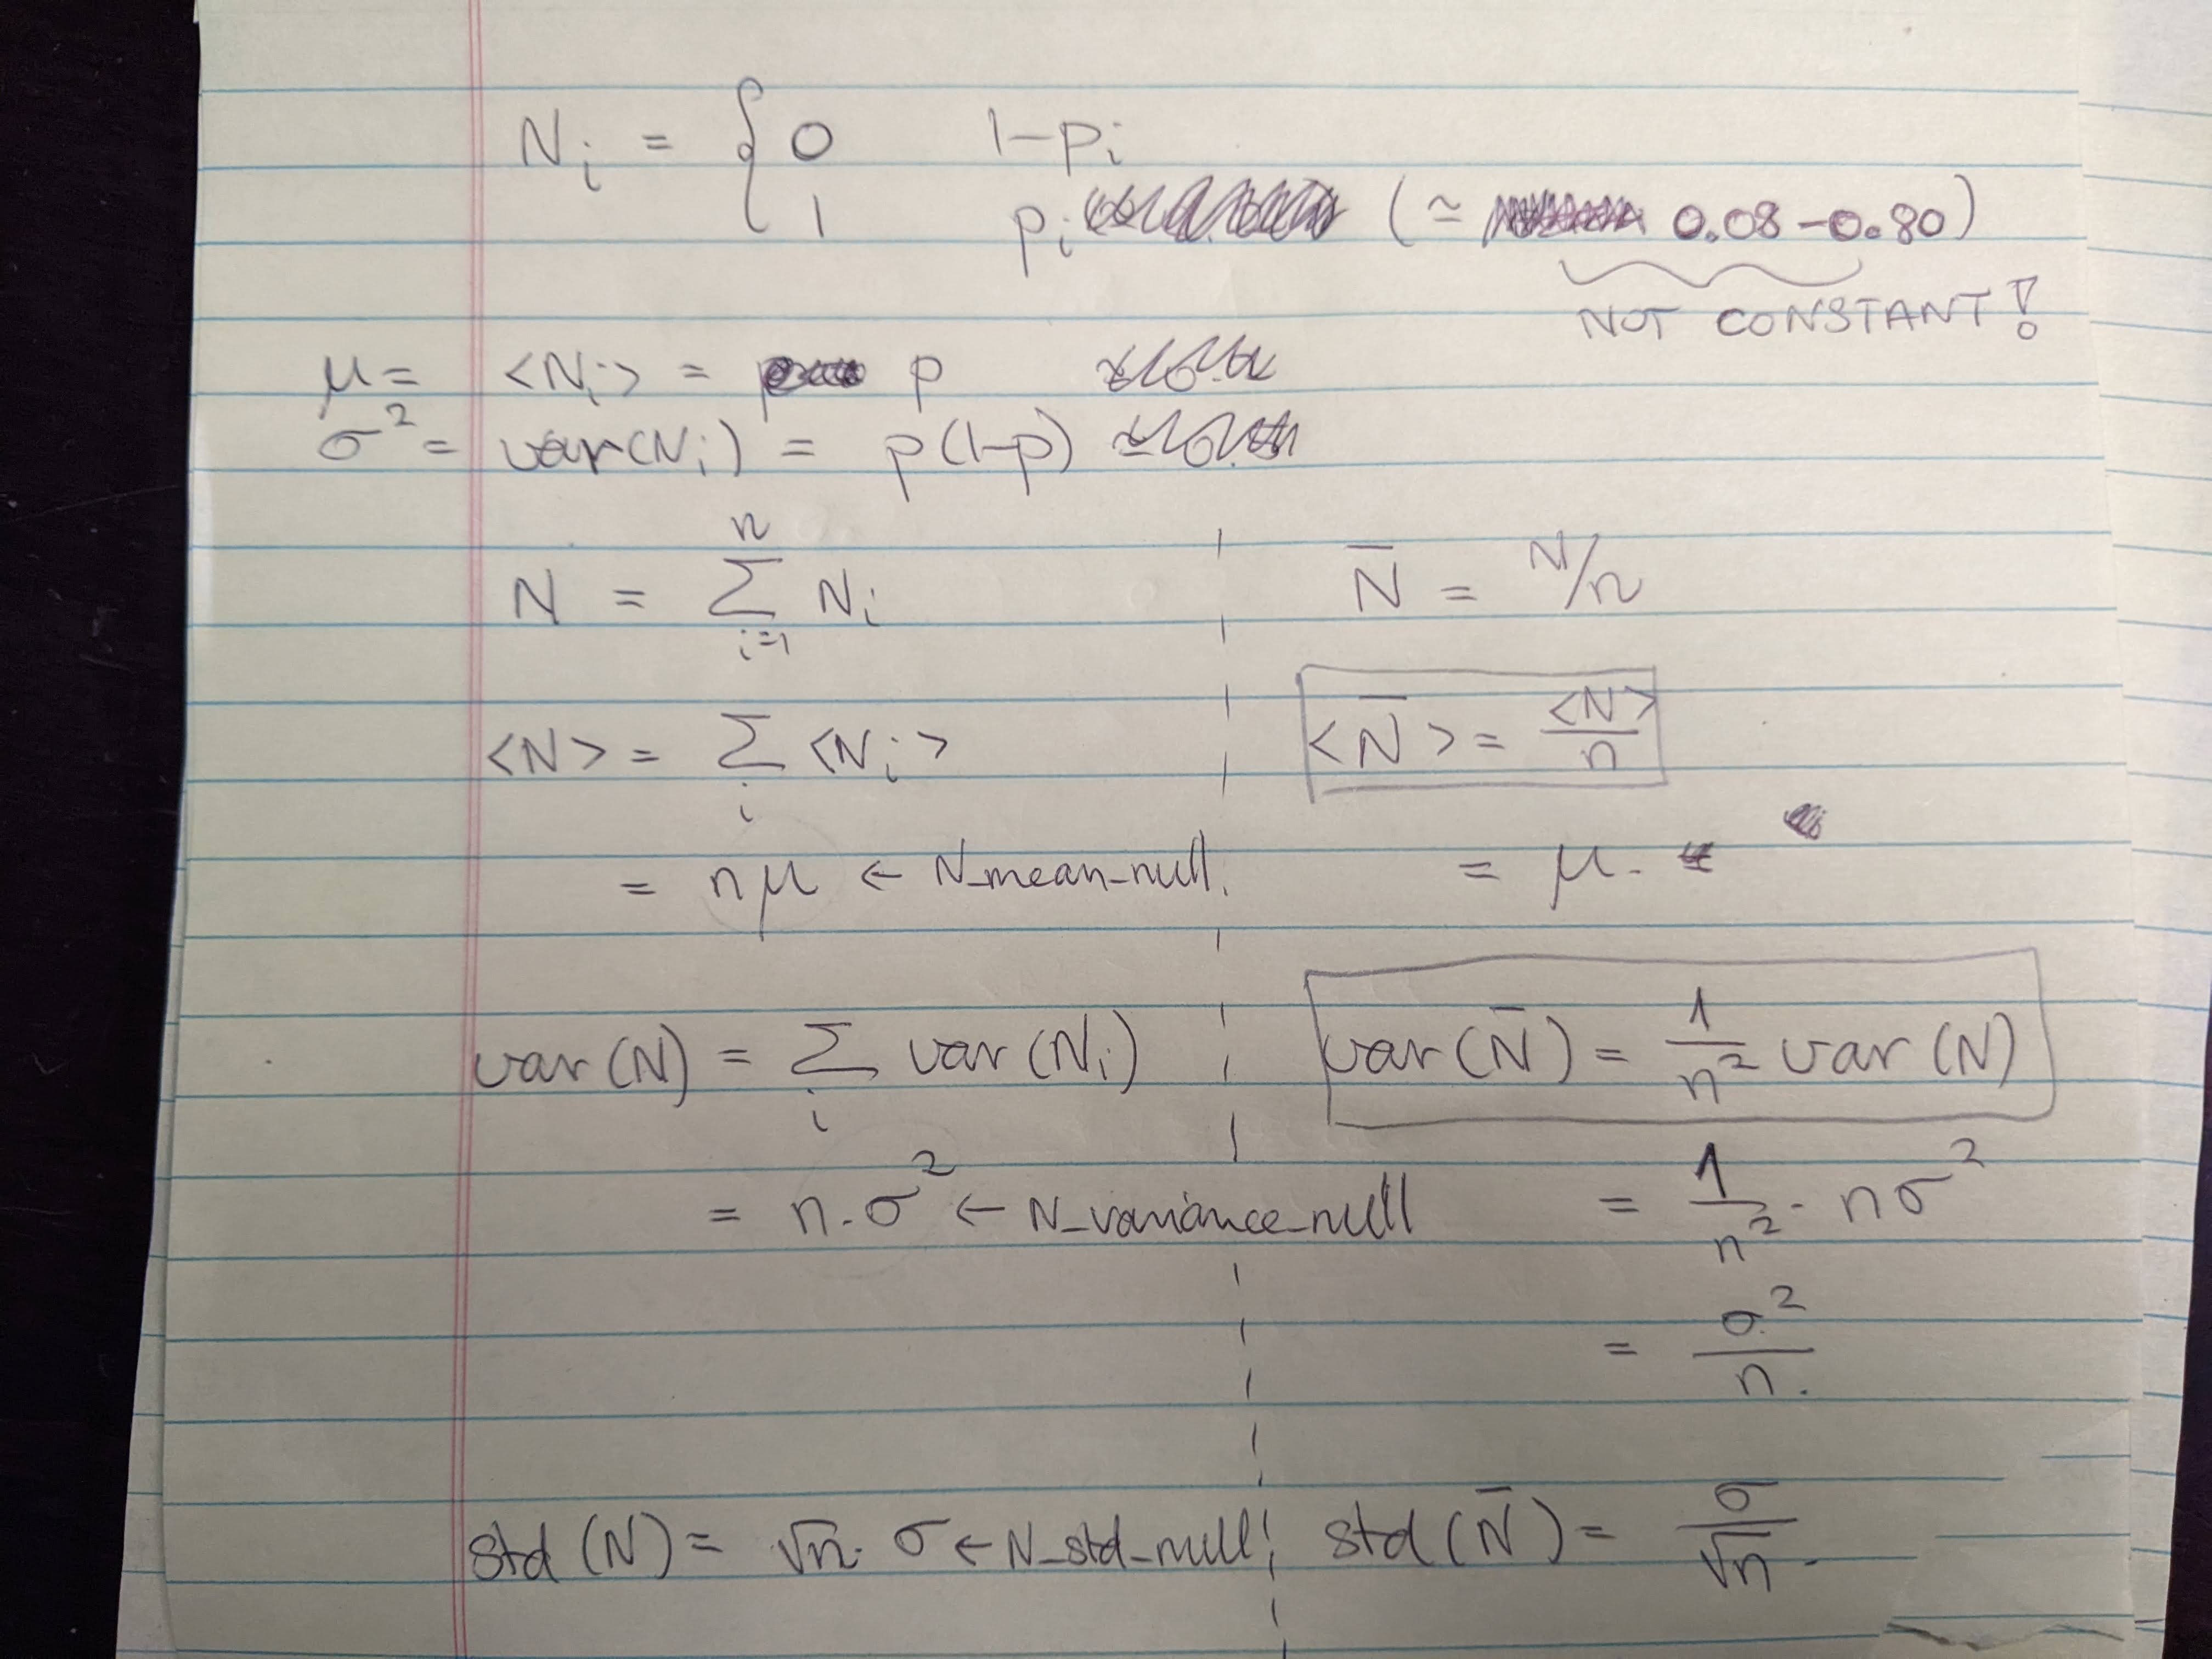

In [175]:
# embed raw image data in notebook: 
# https://github.com/microsoft/vscode-jupyter/issues/6437
from IPython.display import Image
Image(filename='central-limit-theorem.jpg', width=600)

There are two possible sources of noise that aren't accounted for in the vanilla version of the Central Limit Theorem: 

1. substitution probabilities vary by site (making the Bernoulli RVs not IID) 
2. not all windows follow null hypothesis anyway. In fact the proportion of windows that encompass a truly constrained region increases as the window size increases! 


large window size: 1000bp
number of large windows: 1796999
std of some rates under null: [0.01425035 0.01496455 0.01331812 0.01412091 0.01388425]
std of all rates under null: 0.0174770743838832
Pearson correlation between rate_mean_null_3 and rate_observed: 0.33
large window size: 10000bp
number of large windows: 179699
std of some rates under null: [0.00445795 0.00447054 0.00444513 0.00445853 0.00445597]
std of all rates under null: 0.011311322989988
Pearson correlation between rate_mean_null_3 and rate_observed: 0.14
large window size: 100000bp
number of large windows: 17969
std of some rates under null: [0.00140168 0.00136568 0.00138738 0.00139393 0.00138667]
std of all rates under null: 0.009324602413850113
Pearson correlation between rate_mean_null_3 and rate_observed: 0.05
large window size: 1000000bp
number of large windows: 1796
std of some rates under null: [0.00043562 0.00042687 0.00043093 0.00042574 0.00042915]
std of all rates under null: 0.008076060715845561
Pearson correl

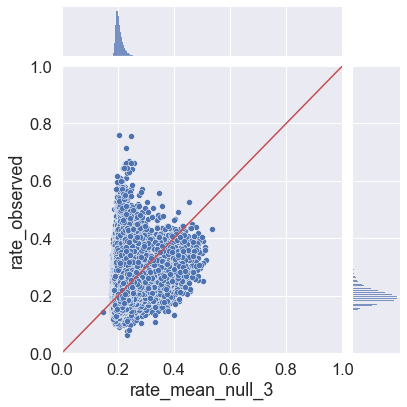

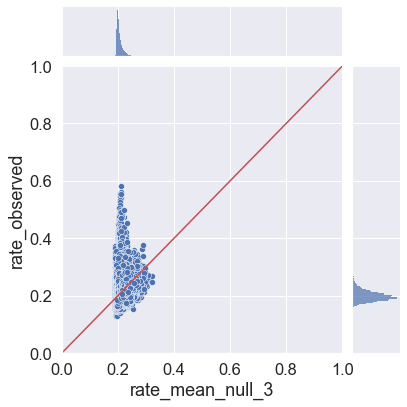

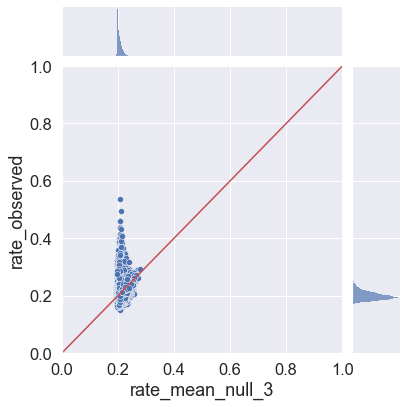

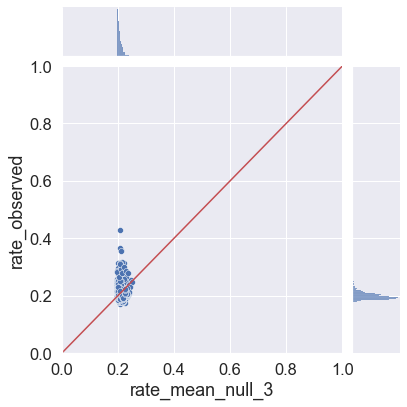

In [176]:
def correlate_rates(kmer_size, number_small_windows_in_large_window): 
    N_mean_null_str = f'N_mean_null_{kmer_size}'
    N_variance_null_str = f'N_variance_null_{kmer_size}'

    large_window_size = 1000*number_small_windows_in_large_window
    print(f'large window size: {1000*number_small_windows_in_large_window}bp')

    observations_and_ALL_mchale_predictions_on_chen_windows['large window id'] = observations_and_ALL_mchale_predictions_on_chen_windows.index//number_small_windows_in_large_window
    aggregated = (
        observations_and_ALL_mchale_predictions_on_chen_windows
            .groupby(['large window id'])
            .agg({
                'N_observed': ['sum', 'count'],
                N_mean_null_str: ['sum', 'count'],
                N_variance_null_str: ['sum', 'count']
            })
    )
    aggregated = aggregated.iloc[:-1] # throw out last large window, as it may be too small

    N_mean_null = aggregated[(N_mean_null_str, "sum")]
    N_variance_null = aggregated[(N_variance_null_str, "sum")]

    rate_mean_null_str = f'rate_mean_null_{kmer_size}'

    x, y = rate_mean_null_str, 'rate_observed'
    aggregated[x] = N_mean_null/large_window_size 
    aggregated[y] = aggregated[('N_observed', 'sum')]/large_window_size 
    aggregated['rate_variance_null'] = N_variance_null/(large_window_size**2)

    print(f'number of large windows: {len(aggregated)}')
    print(f'std of some rates under null: {np.sqrt(np.array(aggregated["rate_variance_null"]))[:5]}')
    print(f'std of all rates under null: {np.std(aggregated[x])}') 

#     lims = [0.15, 0.25]
    lims = [0, 1]
    g = sns.jointplot(data=aggregated, x=x, y=y, xlim=lims, ylim=lims)
    g.ax_joint.plot(lims, lims, "-r", ms=5)

    correlation = aggregated[x].corr(aggregated[y], method='pearson')
    print(f"Pearson correlation between {x} and {y}: {round(correlation, 2)}")

def correlate_rates_1(kmer_size):
    correlate_rates(kmer_size, number_small_windows_in_large_window=1)
    correlate_rates(kmer_size, number_small_windows_in_large_window=10)
    correlate_rates(kmer_size, number_small_windows_in_large_window=100)
    correlate_rates(kmer_size, number_small_windows_in_large_window=1000)
    
correlate_rates_1(kmer_size=3)

large window size: 100000bp
number of large windows: 17969
std of some rates under null: [0.00140168 0.00136568 0.00138738 0.00139393 0.00138667]
std of all rates under null: 0.009324602413850113
Pearson correlation between rate_mean_null_3 and rate_observed: 0.05
large window size: 100000bp
number of large windows: 17969
std of some rates under null: [0.00138908 0.00135266 0.00137518 0.00138396 0.00138024]
std of all rates under null: 0.00882531887901719
Pearson correlation between rate_mean_null_7 and rate_observed: 0.06


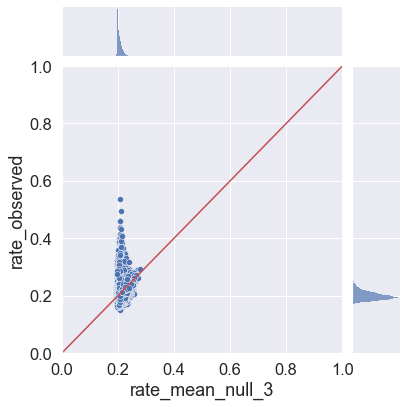

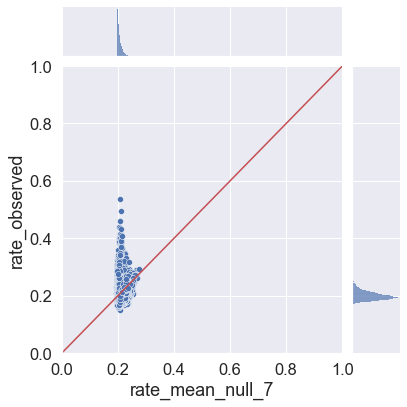

In [177]:
def correlate_rates_2(number_small_windows_in_large_window):
    correlate_rates(kmer_size=3, number_small_windows_in_large_window=number_small_windows_in_large_window)
    correlate_rates(kmer_size=7, number_small_windows_in_large_window=number_small_windows_in_large_window)

correlate_rates_2(number_small_windows_in_large_window=100)

## Expanding window size does not increase divergence between different kmer-size models at enhancer prediction task


In [178]:
def get_enhancers_exons():
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.kmerSizes.trainSets.enhancer-exon.bed'
    df = pd.read_csv(filename, sep='\t')
    df = df[['chromosome', 'start', 'end', 'enhancer overlap', 'window overlaps enhancer', 'window overlaps merged_exon']]
    return df

In [179]:
def add_enhancers_exons(df):
    on = ['chromosome', 'start', 'end']
    how = 'inner'
    return pd.merge(
        df, 
        get_enhancers_exons(), 
        on=on, 
        how=how
    )

def filter_by_exons(window_overlaps_exon): 
    df = get_observations_and_ALL_mchale_predictions_on_chen_windows()
    df = add_enhancers_exons(df)
    df = df[df['window overlaps merged_exon'] == window_overlaps_exon]
    return df 

observations_and_ALL_mchale_predictions_on_chen_windows_noncoding = filter_by_exons(window_overlaps_exon=False)
observations_and_ALL_mchale_predictions_on_chen_windows_coding = filter_by_exons(window_overlaps_exon=True)

In [181]:
def compute_enhancer_enrichment_vs_quantile(df, kmer_size): 
    N_mean_null_str = f'N_mean_null_{kmer_size}'
    N_variance_null_str = f'N_variance_null_{kmer_size}'

    df = (
        df
        .groupby(['large window id'])
        .agg({
            'N_observed': ['sum', 'count'],
            N_mean_null_str: ['sum', 'count'],
            N_variance_null_str: ['sum', 'count'],
            'enhancer overlap': ['sum', 'count'],
            'window overlaps enhancer': ['sum', 'count']
        })
    )
    df = df.iloc[:-1] # throw out last large window, as it may be too small

    N_observed = df[('N_observed', 'sum')]
    N_mean_null = df[(N_mean_null_str, "sum")]
    N_variance_null = df[(N_variance_null_str, "sum")]

    N_bar_str = f'N_bar_{kmer_size}'
    df[N_bar_str] = (N_observed - N_mean_null)/np.sqrt(N_variance_null)

    df['large window overlaps enhancer'] = df[('window overlaps enhancer', 'sum')] > 0
    df['large window enhancer overlap'] = df[('enhancer overlap', 'sum')]
    
    df = label_windows_with_score_quantiles_core(df, N_bar_str)

    number_large_windows = len(df)
    
    df = (
        df
        .groupby([f'{N_bar_str} quantile'])
        .agg({
            ('large window overlaps enhancer', ''): ['mean'],
            ('large window enhancer overlap', ''): ['mean'],
            (N_bar_str, ''): ['mean', 'std', 'count']
        })
    )
    
    quantiles = np.array(df.index)
    enhancer_enrichment = np.array(df[('large window overlaps enhancer', '', 'mean')]).flatten()
    enhancer_overlap = np.array(df[('large window enhancer overlap', '', 'mean')]).flatten()
    hover_data = df.to_dict(orient='records')

    return quantiles, enhancer_enrichment, enhancer_overlap, hover_data, number_large_windows

def create_text(hover_datum, kmer_size):
    score = f'N_bar_{kmer_size}'
    mean = hover_datum[(score, '', 'mean')]
    std = hover_datum[(score, '', 'std')]
    count = hover_datum[(score, '', 'count')]
    return (
        f'{score} mean: {mean}<br>'
        f'{score} std: {std}<br>' 
        f'number of windows: {count}<br>' 
    )

def plot_enhancer_enrichment_vs_large_window_quantile(df): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        fig1 = go.Figure()
        fig2 = go.Figure()

        for number_small_windows_in_large_window in reversed([1, 5, 10]):
            for kmer_size in [3, 5, 7]:
                large_window_size = 1000*number_small_windows_in_large_window
                df = df.reset_index(drop=True)
                df['large window id'] = df.index//number_small_windows_in_large_window

                quantiles, enhancer_enrichment, enhancer_overlap, hover_data, number_large_windows = \
                    compute_enhancer_enrichment_vs_quantile(df, kmer_size)
                fig1.add_trace(
                    go.Scatter(
                        x = quantiles, 
                        y = enhancer_enrichment,
                        mode = 'lines+markers',
#                         line = {
#                             'color': color, 
#                             'dash': 'dot'
#                         },
#                         marker = {
#                             'symbol': marker,
#                         },
                        name = f'{number_large_windows} {1000*number_small_windows_in_large_window}bp windows; N_bar_{kmer_size}',
                        hovertemplate = (
                            '%{text}'
                        ),
                        text = [create_text(hover_datum, kmer_size) for hover_datum in hover_data],
                    )
                )
                fig2.add_trace(
                    go.Scatter(
                        x = quantiles, 
                        y = enhancer_overlap,
                        mode = 'lines+markers',
#                         line = {
#                             'color': color, 
#                             'dash': 'dot'
#                         },
#                         marker = {
#                             'symbol': marker,
#                         },
                        name = f'window size={1000*number_small_windows_in_large_window}bp; N_bar_{kmer_size}',
                        hovertemplate = (
                            '%{text}'
                        ),
                        text = [create_text(hover_datum, kmer_size) for hover_datum in hover_data],
                    )
                )

        fig1.update_xaxes(
            title = 'quantile of window score',
            tickangle=45,
#             type = "log", 
#             exponentformat = 'power'
        )
        fig2.update_xaxes(
            title = 'quantile of window score',
            tickangle=45,
#             type = "log", 
#             exponentformat = 'power'
        )
        fig1.update_yaxes(
            title = 'fraction of windows that overlap enhancers',
            range=[0, 1], 
        )    
        fig2.update_yaxes(
            title = 'mean enhancer-window overlap (bps)',
            range=None, 
            type = "log", 
            exponentformat = 'power'
        )    
        fig1.update_layout(
            title = None,
            height = 800, 
            width = 1400,
            font = dict(
                size = 20,
            )        
        )
        fig2.update_layout(
            title = None,
            height = 800, 
            width = 1400,
            font = dict(
                size = 20,
            )        
        )
        fig1.update_annotations(font_size=24)
        fig2.update_annotations(font_size=24)
        fig1.show()
        fig2.show()

plot_enhancer_enrichment_vs_large_window_quantile(observations_and_ALL_mchale_predictions_on_chen_windows_noncoding)